# Text Analysis for Women's E-Commerce Clothing Reviews


## Libraries and Settings

In [21]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, plot_roc_curve

%config Completer.use_jedi = False

## Variables

In [2]:
FEATURED_DIR = os.path.join(os.pardir, 'data', 'featured')
RANDOM_STATE = 8
TARGET = 'recommended_ind'

## Helpers

In [3]:
def load_data(path, filename):
    data_path = os.path.join(path, filename)
    df = pd.read_csv(data_path)
    return df

def report(y_true, y_pred, labels):
    cm = pd.DataFrame(confusion_matrix(y_true=y_true, y_pred=y_pred), 
                                        index=labels, columns=labels)
    rep = classification_report(y_true=y_true, y_pred=y_pred)
    return (f'Confusion Matrix:\n{cm}\n\nClassification Report:\n{rep}')

## Load Data

In [4]:
train = load_data(FEATURED_DIR, 'train_abt.csv')
test = load_data(FEATURED_DIR, 'test_abt.csv')

## Train: Target and Variables

In [5]:
X_train = train[train.columns.difference([TARGET])]
y_train = train[TARGET]

In [6]:
X_train.shape

(22248, 11186)

In [7]:
y_train.value_counts()

1    11148
0    11100
Name: recommended_ind, dtype: int64

In [9]:
X_test = test[train.columns.difference([TARGET])]
y_test = test[TARGET]

## Model Training

### Logistic Regression

In [10]:
logit_model = LogisticRegression(random_state=RANDOM_STATE)
logit_model.fit(X_train, y_train)

/Users/inardini/opt/anaconda3/envs/general/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=8)

Confusion Matrix:
      0     1
0  2840   942
1  1712  1922

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      3782
           1       0.67      0.53      0.59      3634

    accuracy                           0.64      7416
   macro avg       0.65      0.64      0.64      7416
weighted avg       0.65      0.64      0.64      7416



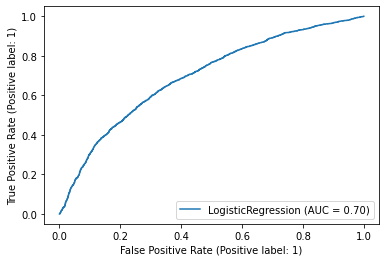

In [11]:
test_predictions = logit_model.predict(X_test)
print(report(y_test, test_predictions, logit_model.classes_ ))
plot_roc_curve(logit_model, X_test, y_test)  
plt.show()

### Decision Tree

In [12]:
dtree_model = DecisionTreeClassifier(random_state=RANDOM_STATE)
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

Confusion Matrix:
      0     1
0  3699    83
1   624  3010

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      3782
           1       0.97      0.83      0.89      3634

    accuracy                           0.90      7416
   macro avg       0.91      0.90      0.90      7416
weighted avg       0.91      0.90      0.90      7416



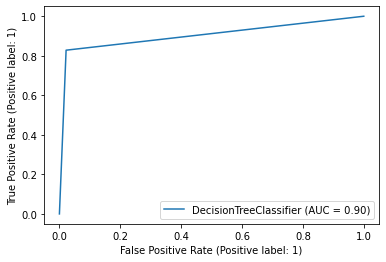

In [13]:
test_predictions = dtree_model.predict(X_test)
print(report(y_test, test_predictions, dtree_model.classes_ ))
plot_roc_curve(dtree_model, X_test, y_test)  
plt.show() 

### Random Forest

In [14]:
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

Confusion Matrix:
      0     1
0  3694    88
1   204  3430

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3782
           1       0.97      0.94      0.96      3634

    accuracy                           0.96      7416
   macro avg       0.96      0.96      0.96      7416
weighted avg       0.96      0.96      0.96      7416



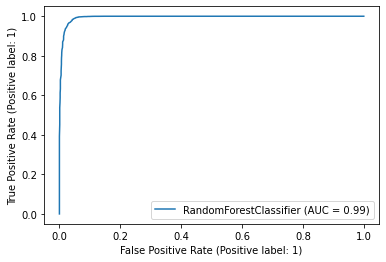

In [15]:
test_predictions = rf_model.predict(X_test)
print(report(y_test, test_predictions, rf_model.classes_ ))
plot_roc_curve(rf_model, X_test, y_test)  
plt.show() 

### Gradient Boosting

In [16]:
gb_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=8)

Confusion Matrix:
      0     1
0  3164   618
1   629  3005

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3782
           1       0.83      0.83      0.83      3634

    accuracy                           0.83      7416
   macro avg       0.83      0.83      0.83      7416
weighted avg       0.83      0.83      0.83      7416



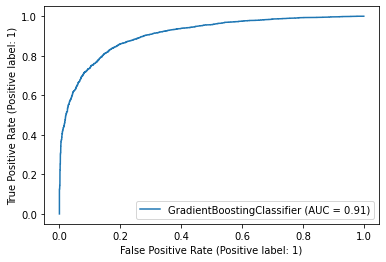

In [17]:
test_predictions = gb_model.predict(X_test)
print(report(y_test, test_predictions, gb_model.classes_ ))
plot_roc_curve(gb_model, X_test, y_test)  
plt.show() 

### XGBoost

In [18]:
xgb_model = XGBClassifier(booster=, random_state=RANDOM_STATE)
xgb_model.fit(X_train, y_train)

/Users/inardini/opt/anaconda3/envs/general/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:58:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=8,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Confusion Matrix:
      0     1
0  3164   618
1   629  3005

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3782
           1       0.83      0.83      0.83      3634

    accuracy                           0.83      7416
   macro avg       0.83      0.83      0.83      7416
weighted avg       0.83      0.83      0.83      7416



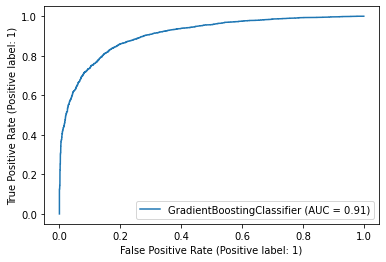

In [19]:
test_predictions = xgb_model.predict(X_test)
print(report(y_test, test_predictions, xgb_model.classes_ ))
plot_roc_curve(xgb_model, X_test, y_test)  
plt.show()

### LightBGM

In [23]:
lgb_model = LGBMClassifier(random_state=RANDOM_STATE)
lgb_model.fit(X_train, y_train)

LGBMClassifier(random_state=8)

Confusion Matrix:
      0     1
0  3571   211
1   437  3197

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3782
           1       0.94      0.88      0.91      3634

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416



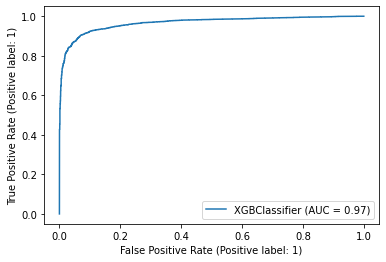

In [24]:
test_predictions = xgb_model.predict(X_test)
print(report(y_test, test_predictions, xgb_model.classes_ ))
plot_roc_curve(xgb_model, X_test, y_test)  
plt.show()

## Comment

The model which performs best is **Random Forest**. Let's tune it.